In [ ]:
%pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [ ]:
tesla=pd.read_csv("/content/tesla.csv")
tesla.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,07-07-2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,08-07-2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,09-07-2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,12-07-2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,13-07-2010,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [ ]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [ ]:
tesla['Date']=pd.to_datetime(tesla['Date'])

<ipython-input-7-46707f19ca4d>:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')
print(f'Total days={tesla.Date.max()-tesla.Date.min()} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total days=3181 days 00:00:00 days


In [ ]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

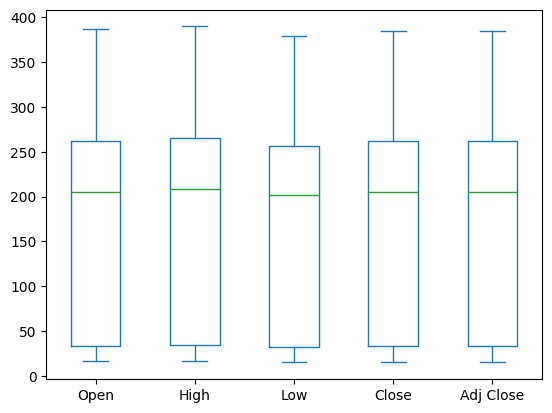

In [ ]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
layout=go.Layout(
    title="Stock prices of tesla",
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courir New,monospace',
            size=18,
            color="#7f7f7f",
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courir New,monospace',
            size=18,
            color="#7f7f7f",
        )
    )
)
tesla_data=[{'x':tesla['Date'],'y':tesla['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



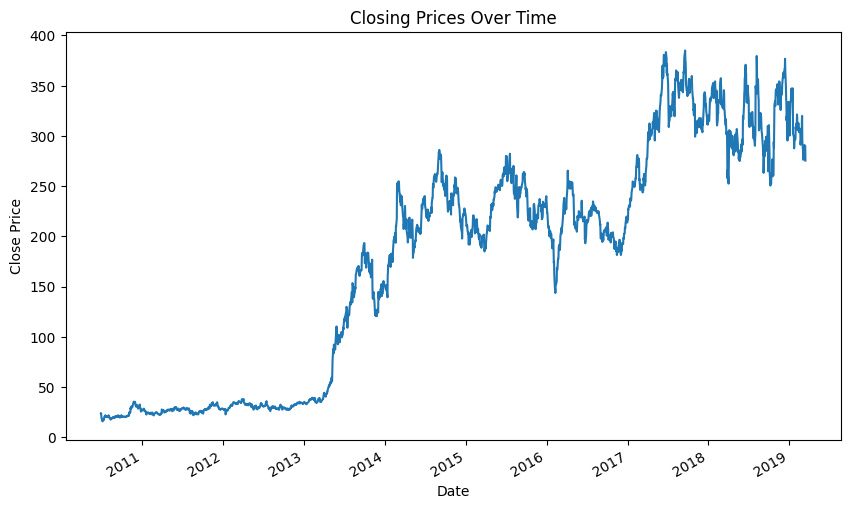

In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla.set_index('Date', inplace=True)
tesla['Close'].plot(figsize=(10, 6), title="Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
x=np.array(tesla.index).reshape(-1,1)
y=tesla['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
scaler=StandardScaler().fit(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(x_train.dtype)
x_train[:, 0] = x_train[:, 0].astype('datetime64[s]').astype(int)


float64


In [ ]:
!pip install plotly


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from sklearn.linear_model import LinearRegression

init_notebook_mode(connected=True)

x_train = np.array([np.datetime64('2024-01-01'), np.datetime64('2024-01-02'), np.datetime64('2024-01-03')]).reshape(-1, 1)
y_train = np.array([1.0, 2.0, 3.0])

x_train[:, 0] = x_train[:, 0].astype('datetime64[D]').astype(int)

x_train = x_train.astype(float)

lm = LinearRegression()
lm.fit(x_train, y_train)

predictions = lm.predict(x_train)

trace0 = go.Scatter(
    x=x_train[:, 0],
    y=y_train,
    mode='markers',
    name='Actual'
)

trace1 = go.Scatter(
    x=x_train[:, 0],
    y=predictions,
    mode="lines",
    name="Predicted"
)

layout = go.Layout(
    xaxis=dict(title='Day'),
    yaxis=dict(title='Values')
)

plot2 = go.Figure(data=[trace0, trace1], layout=layout)

iplot(plot2)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error as mse

x_train[:, 0] = x_train[:, 0].astype('datetime64[D]').astype(int)
x_test[:, 0] = x_test[:, 0].astype('datetime64[D]').astype(int)

x_train = x_train.astype(float)
x_test = x_test.astype(float)

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''

print(scores)



Metric           Train                Test        
r2_score  1.0	1.0
MSE       0.0	0.0

